<a href="https://colab.research.google.com/github/xazhu9/AIPI-590/blob/main/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.EDA

Data analysis(Asked ChatGPT about EDA and assumption for different models, especially for GAM)

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


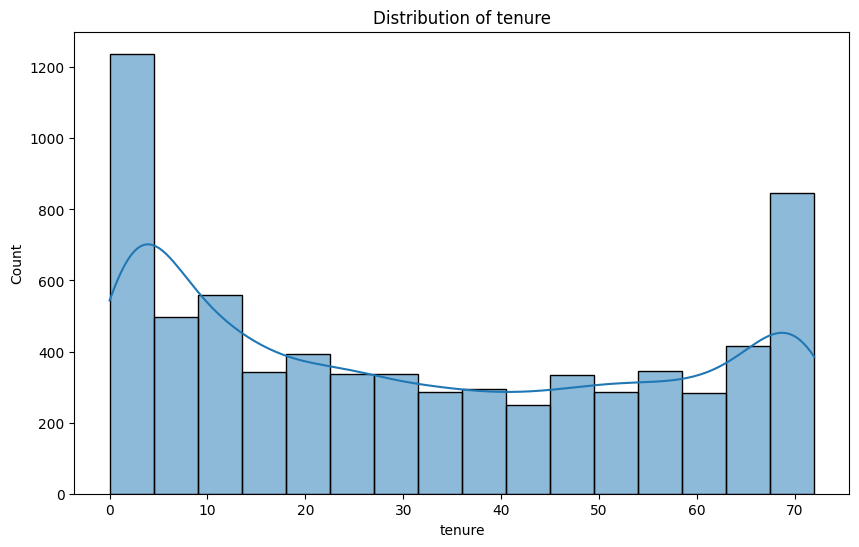

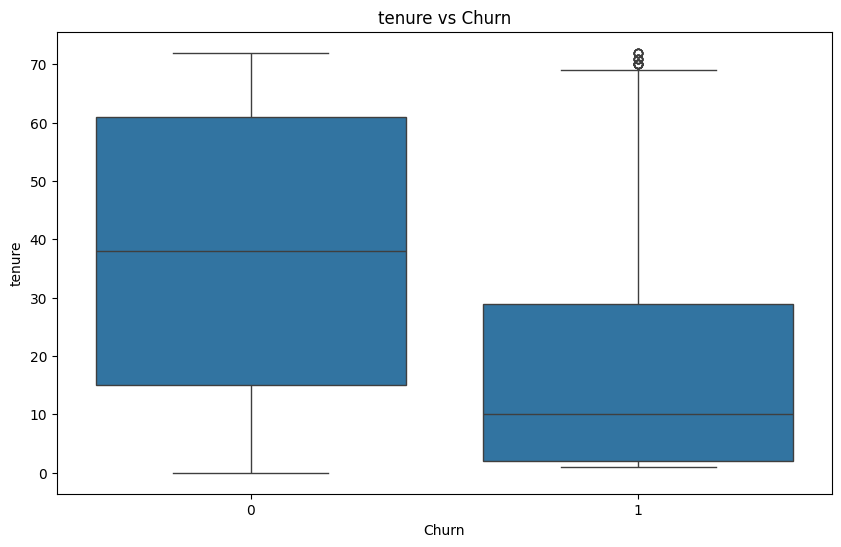

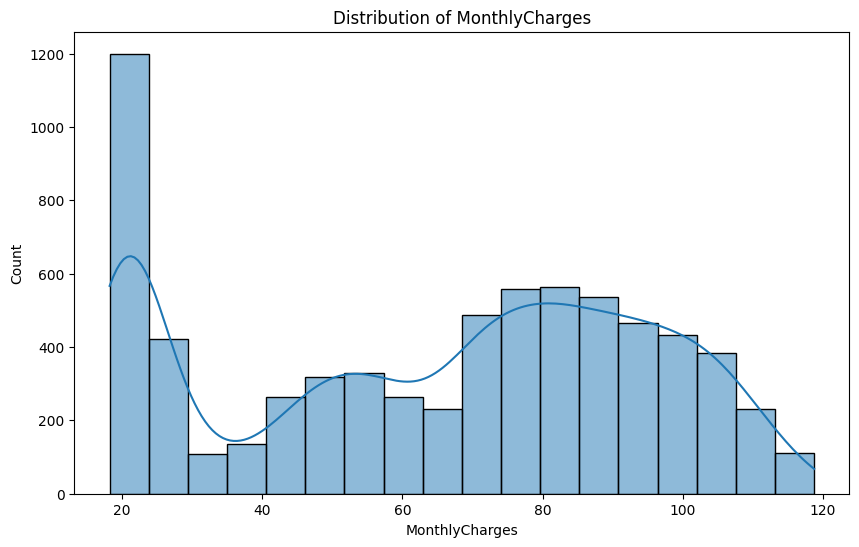

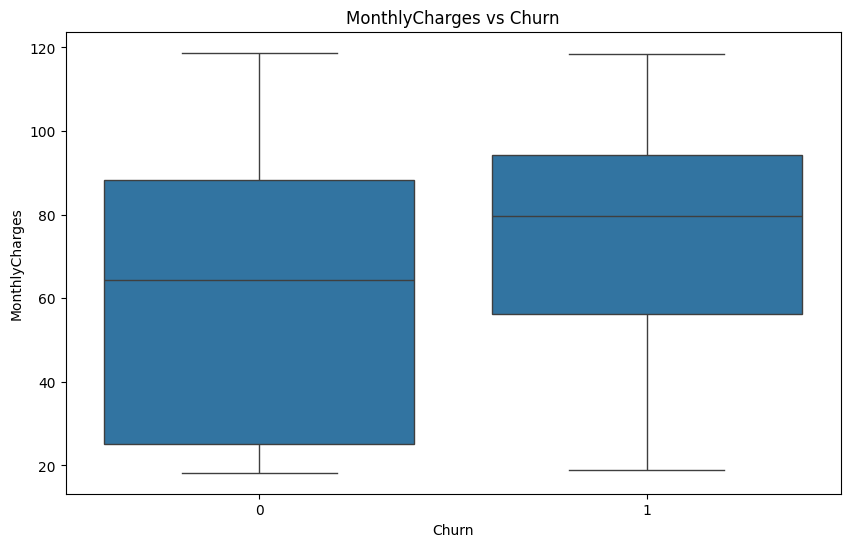

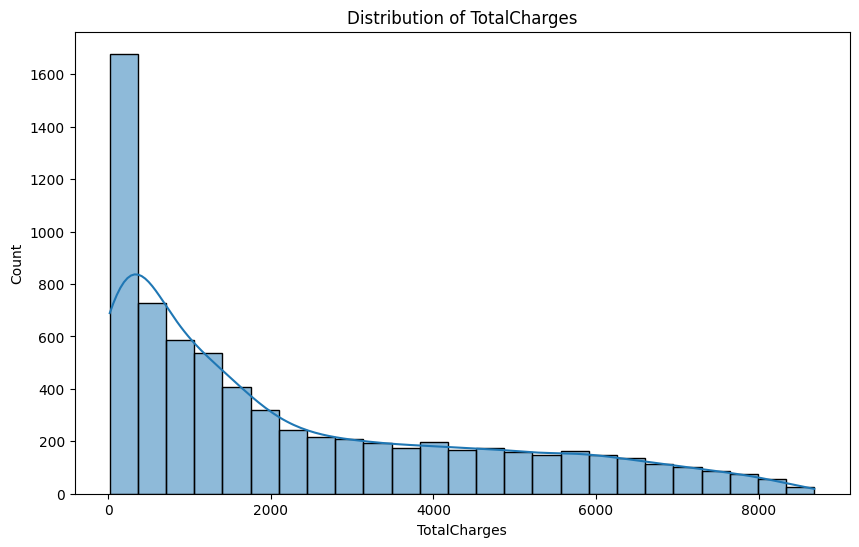

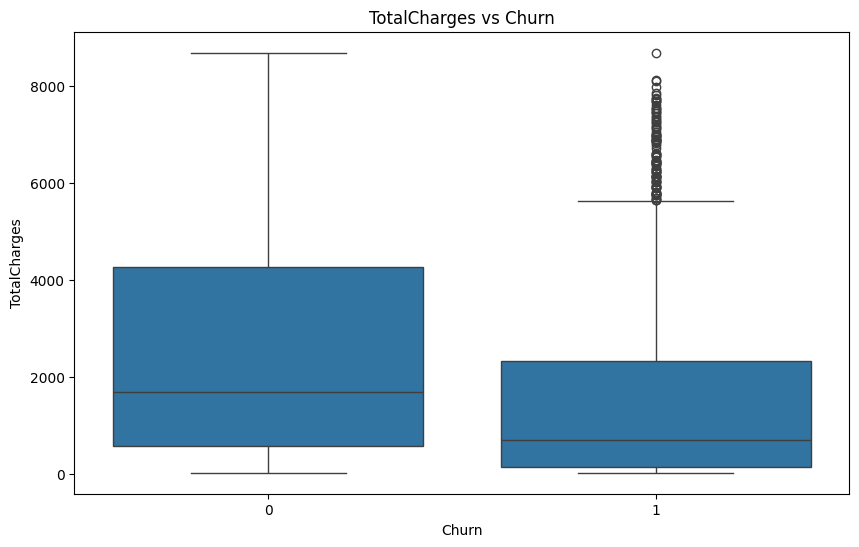

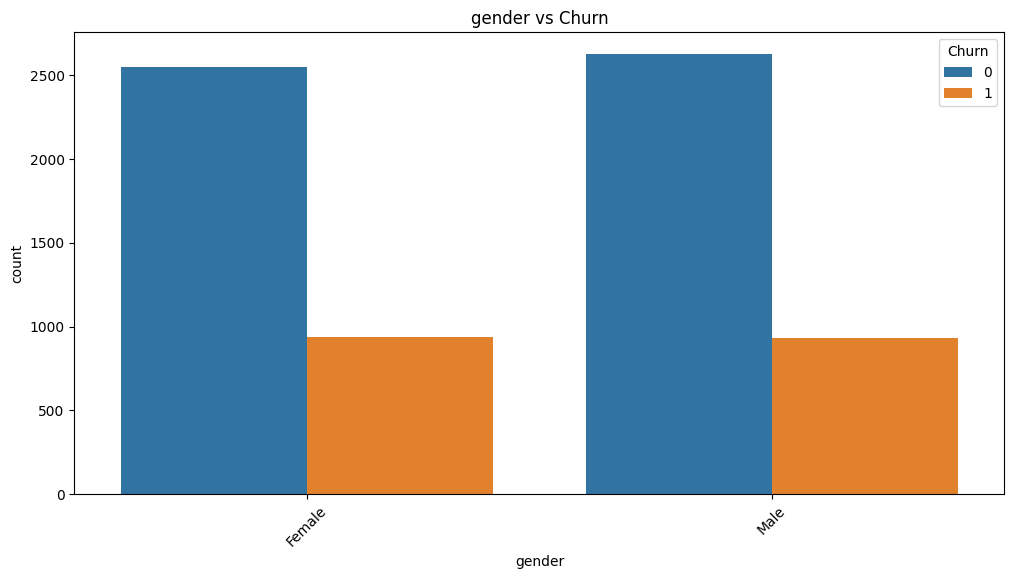

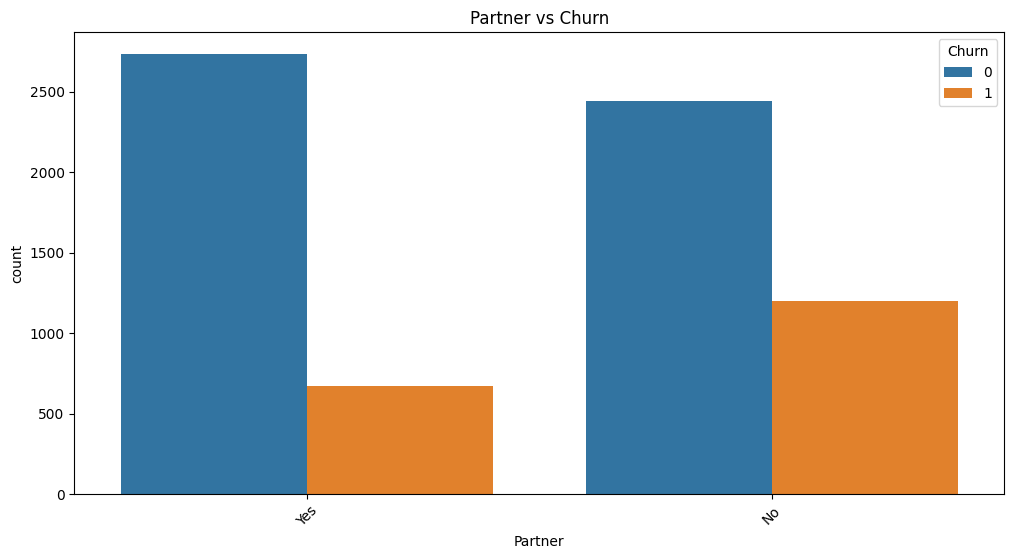

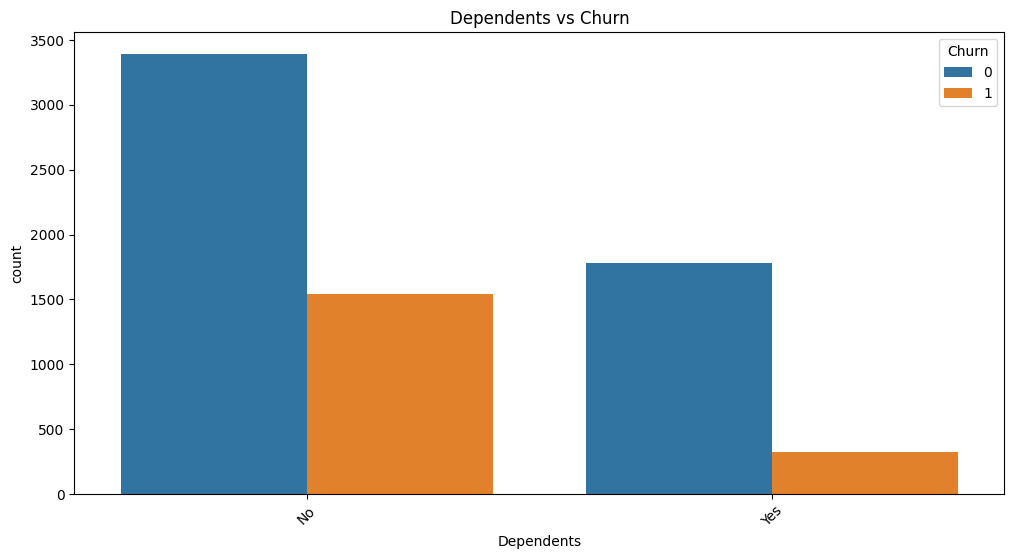

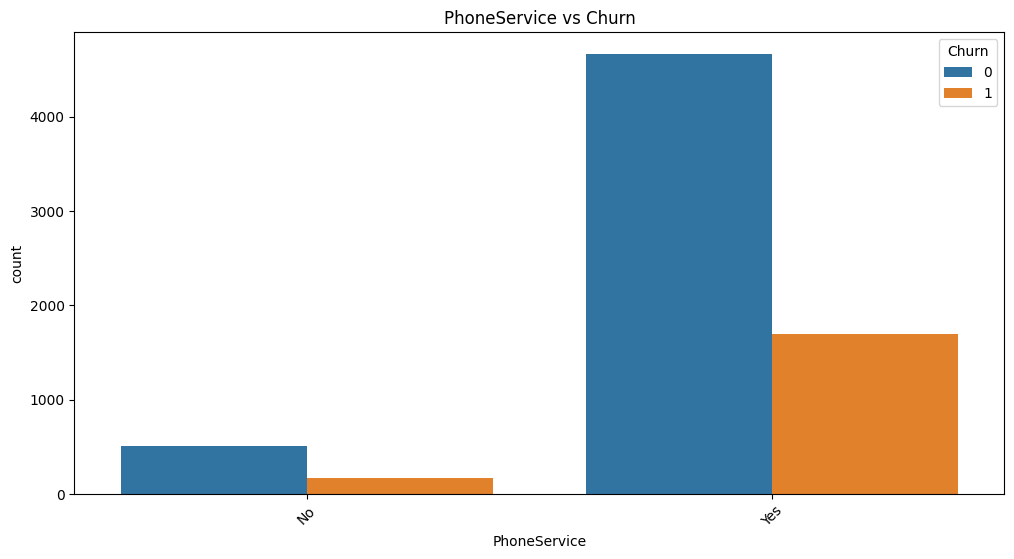

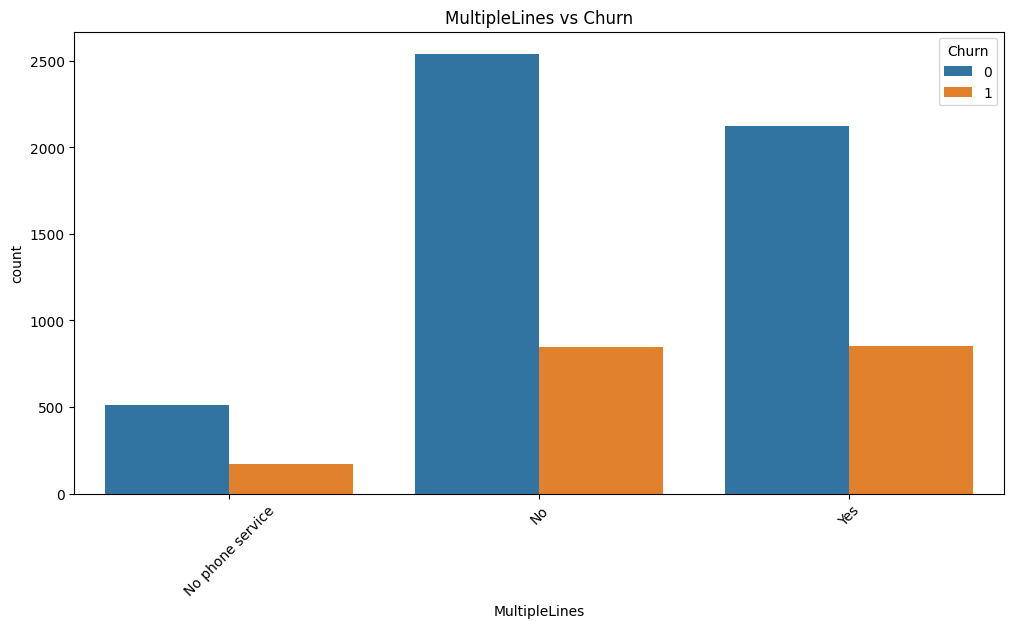

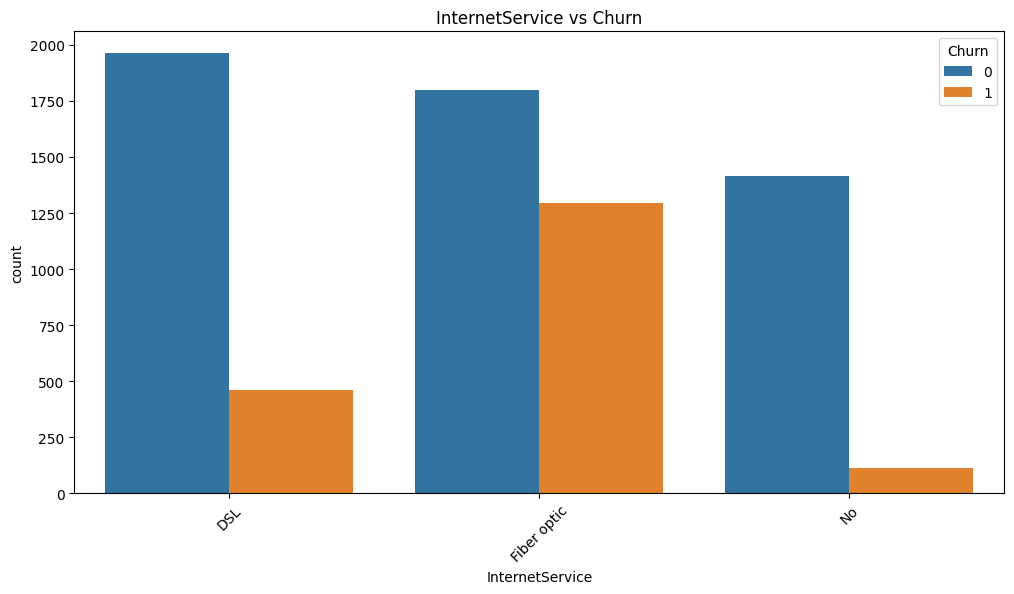

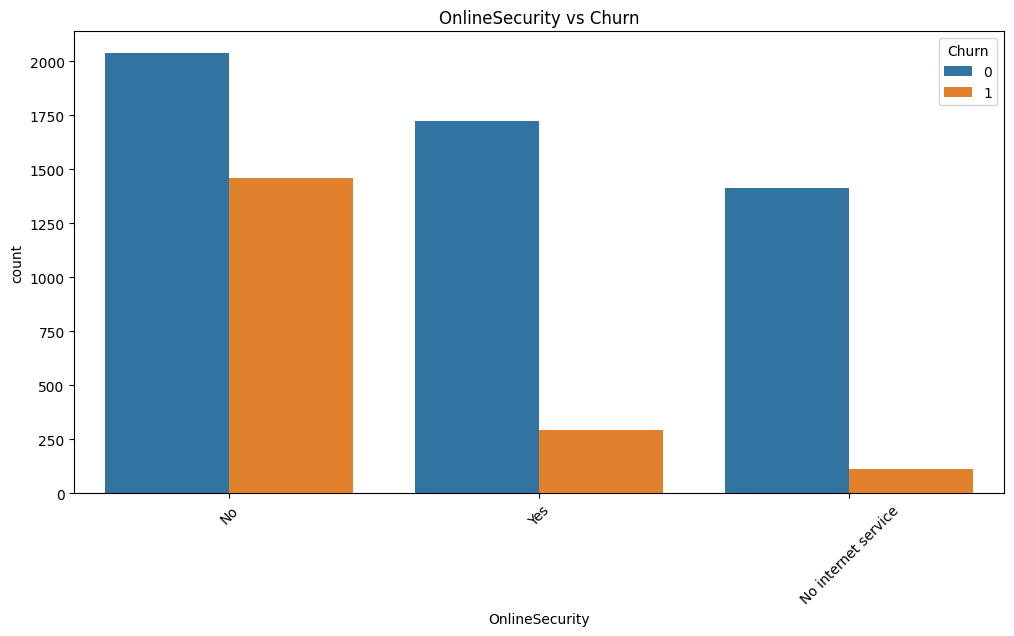

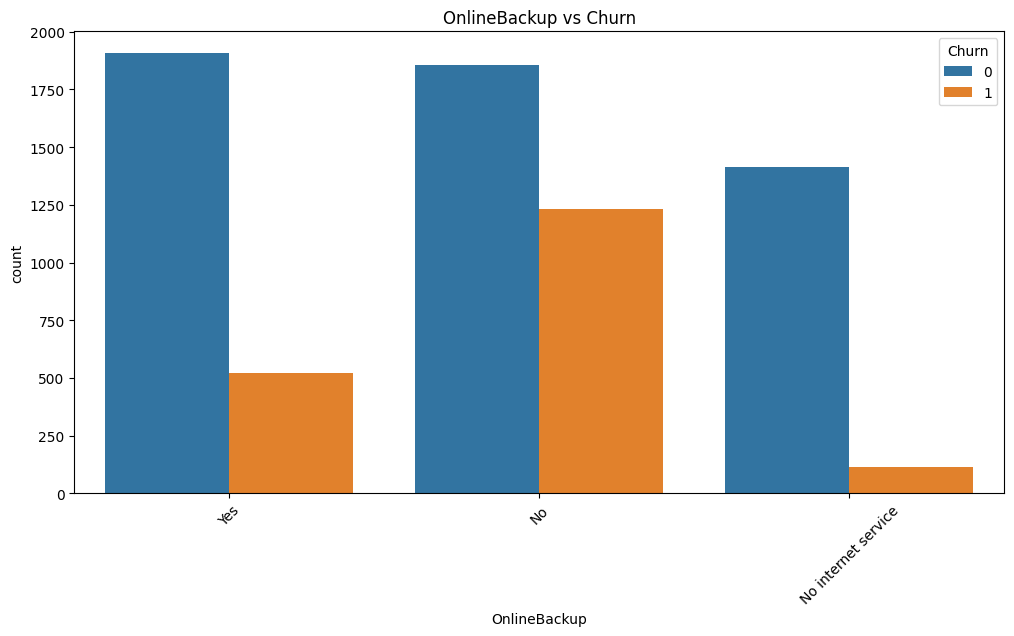

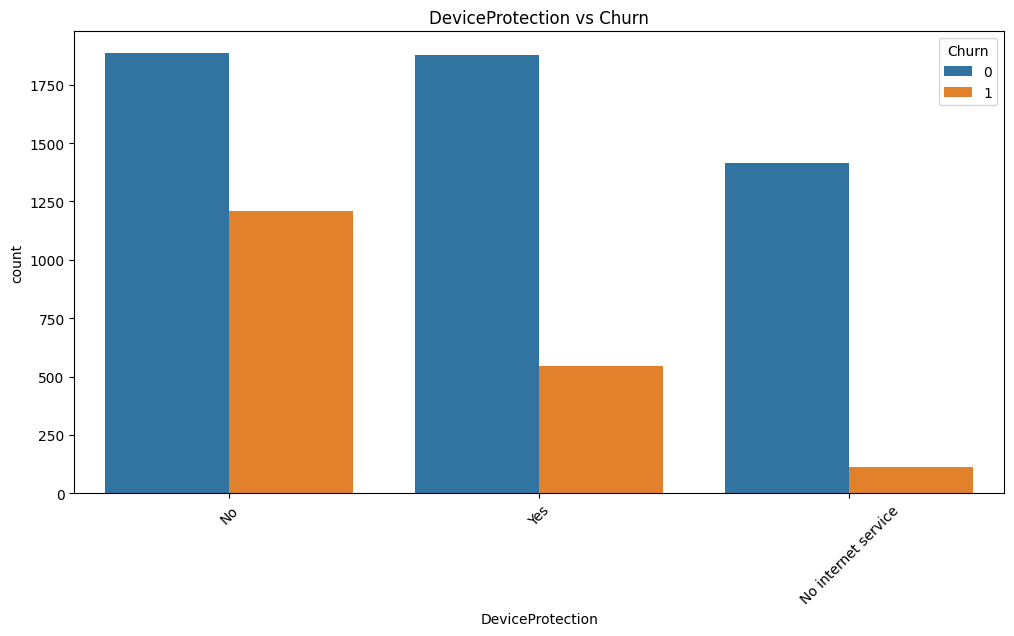

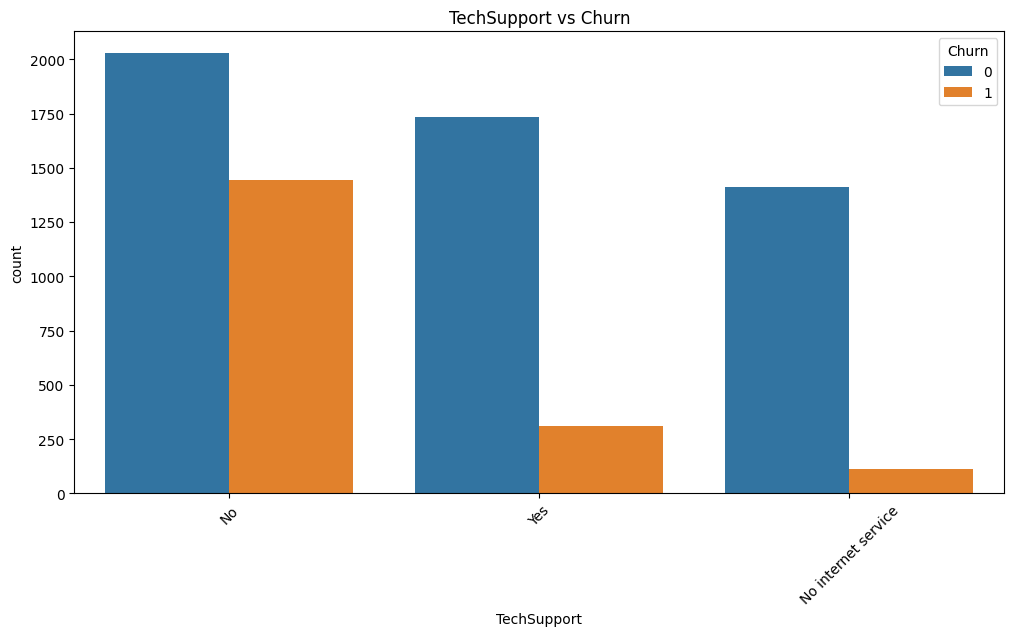

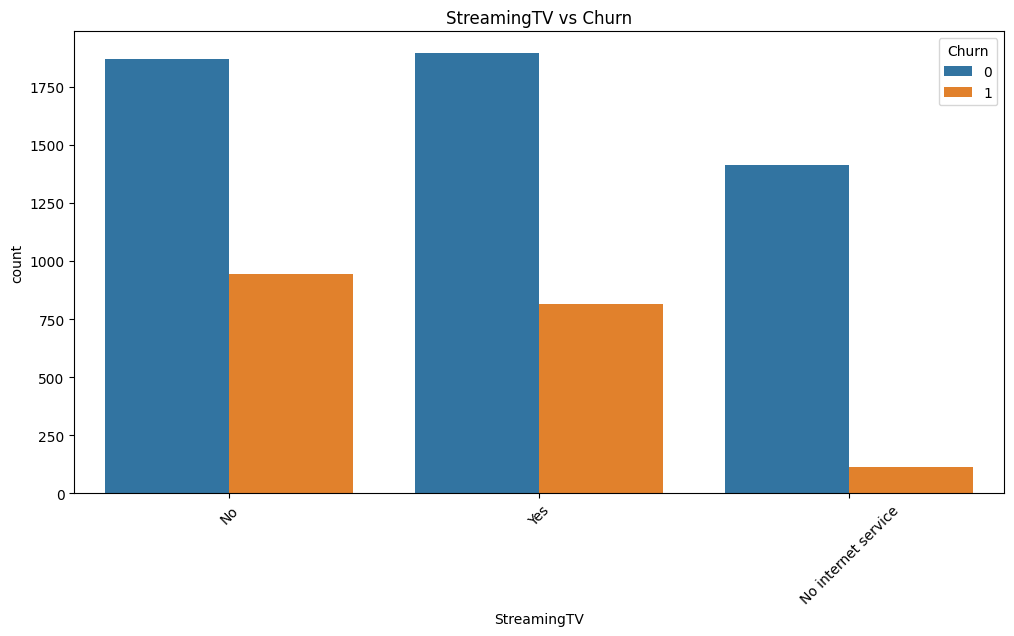

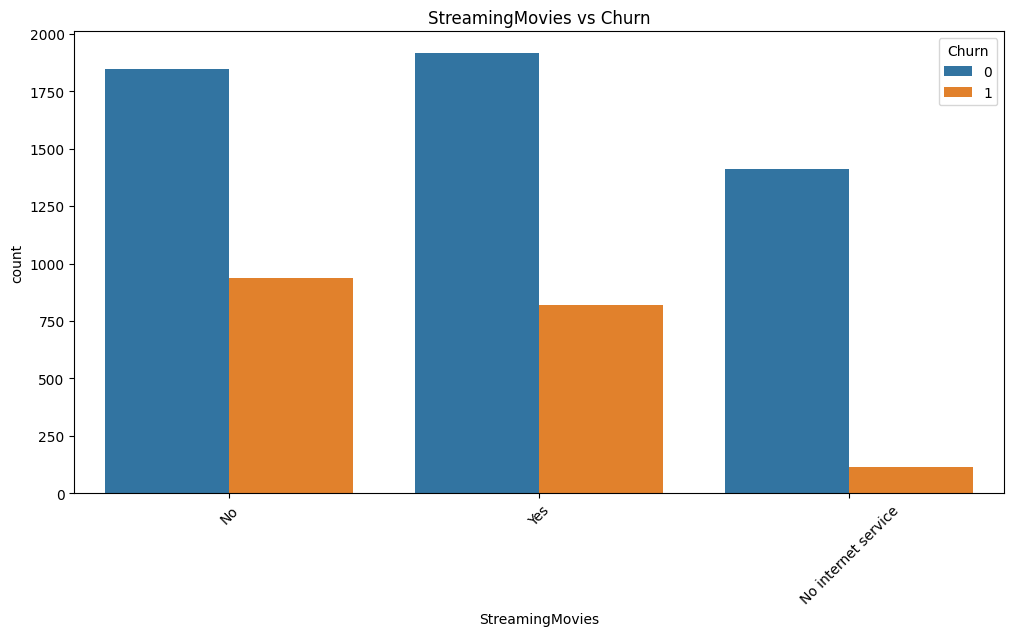

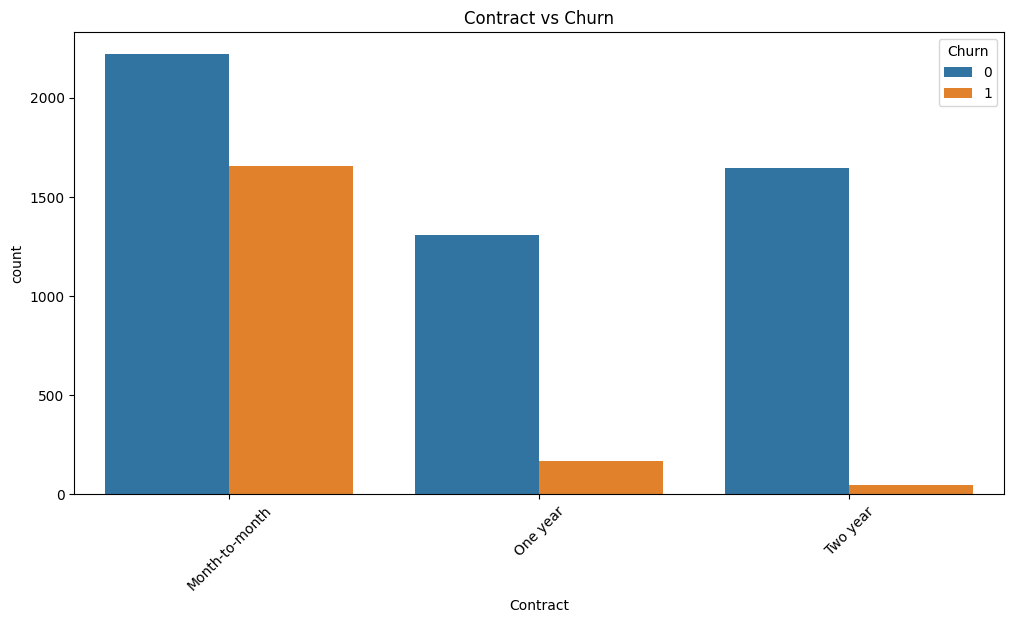

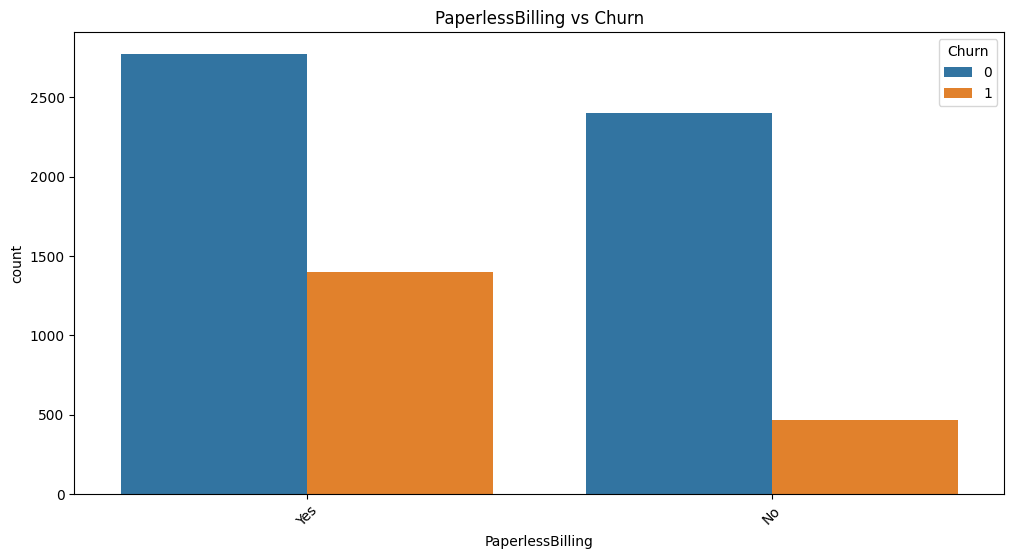

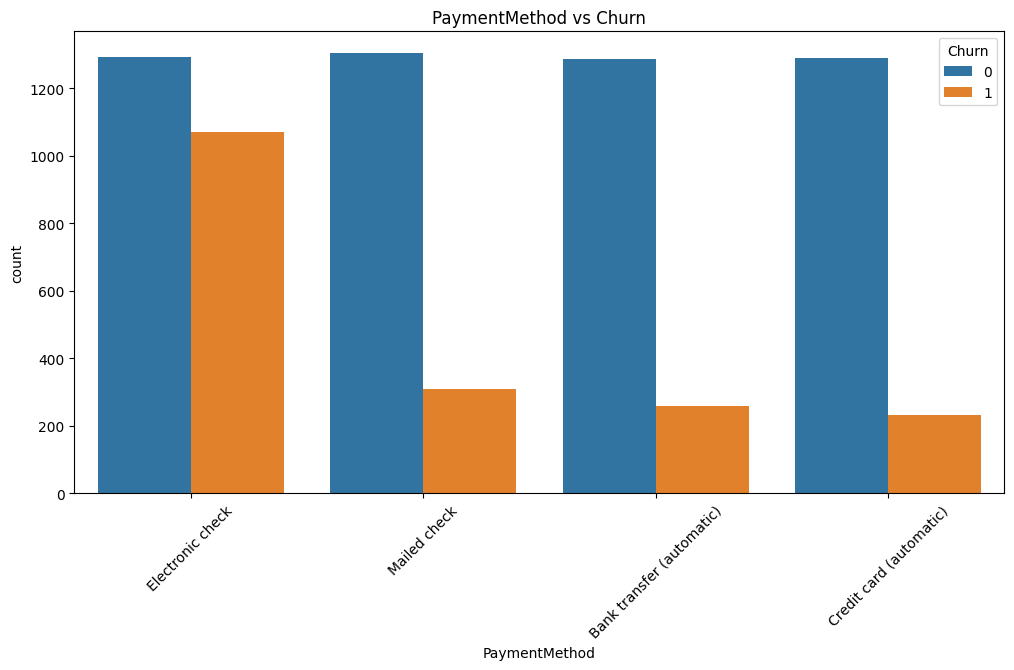

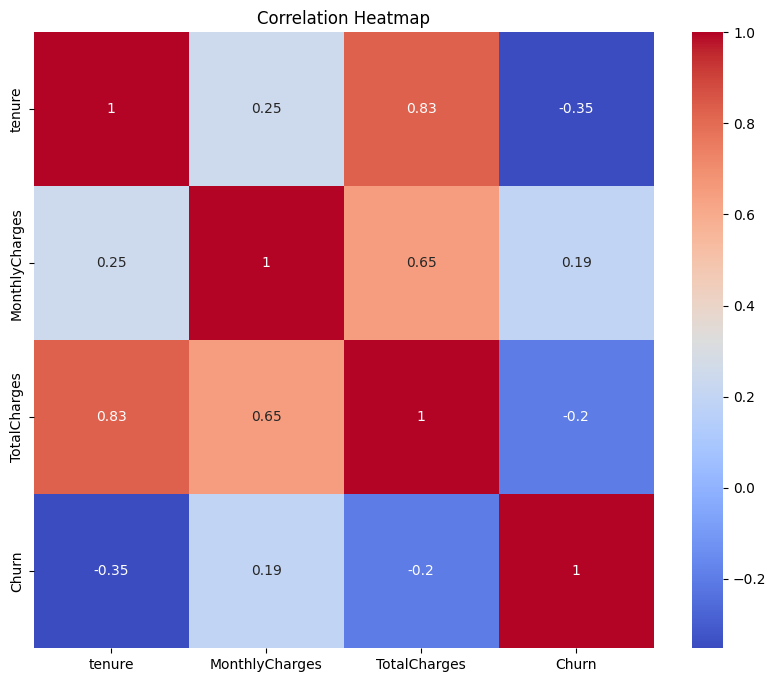

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# GitHub raw content URL
url = "https://raw.githubusercontent.com/xazhu9/AIPI-590/main/Assignment%203/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load from github
df = pd.read_csv(url)

# Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

# Transform TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Transform Chur to Binary
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# Numerical variables analysis
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Box plot grouped by Churn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# Categorical variables analysis
categorical_cols = df.select_dtypes(include=['object']).columns
# Exclude customerID
categorical_cols = [col for col in categorical_cols if col != 'customerID']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

# Correlation analysis
correlation_matrix = df[numerical_cols + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Model Assumption Check

Clean NaN

In [2]:
# Prepare data for modeling
X = df[numerical_cols]
y = df['Churn']

# 1. Linear Regression Assumptions
# Check for NaN values in numerical columns
print(X.isna().sum())
# Check all NaN value
print("Columns with NaN values:")
print(df.isna().sum())

# replace NaN with 0
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(0)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check for NaN again
print("\nRemaining NaN values after handling:")
print(df.isna().sum())

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64
Columns with NaN values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Remaining NaN values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBill

Check for Linearity

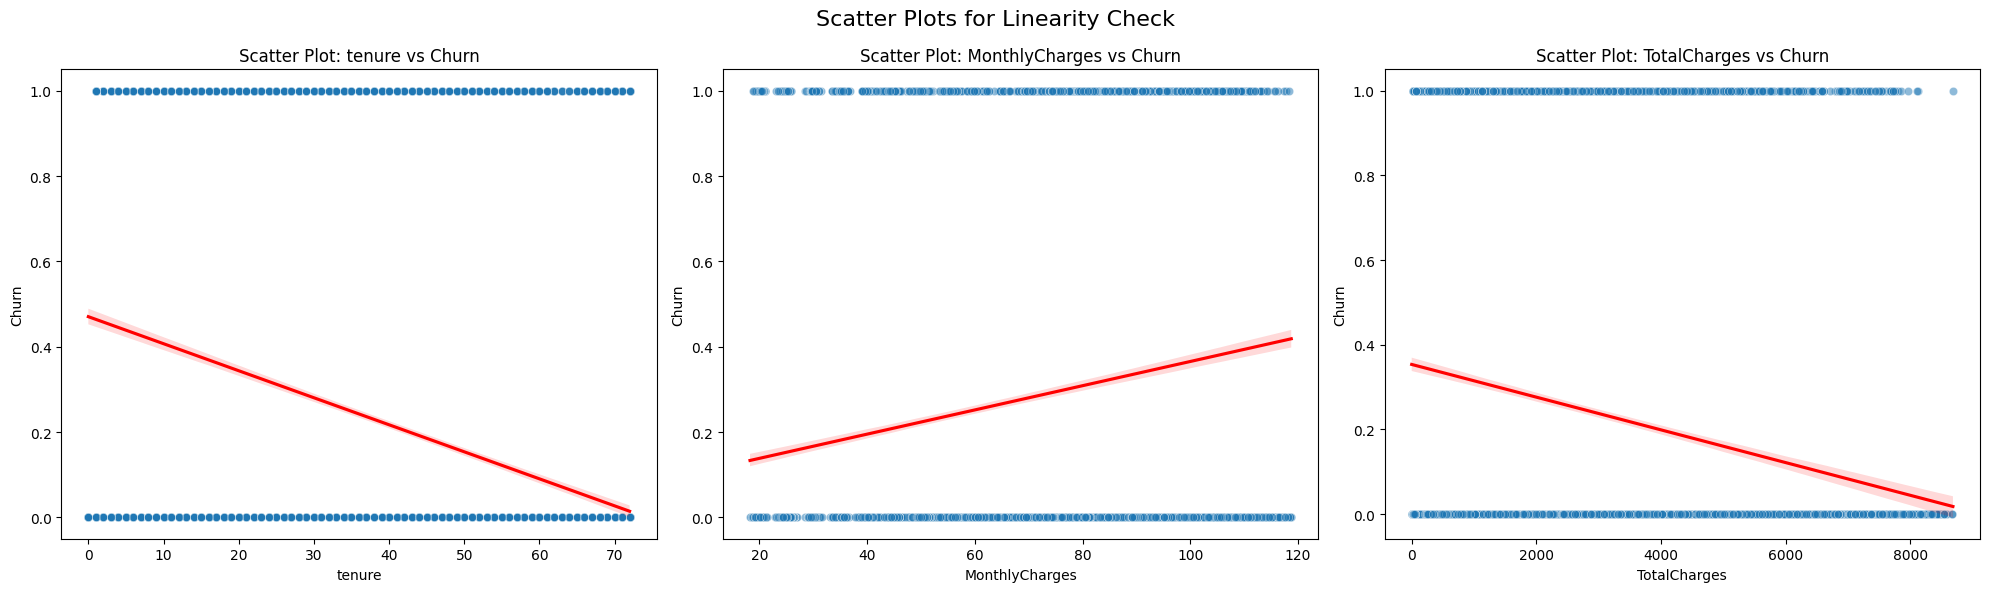

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Scatter Plots for Linearity Check', fontsize=16)


for i, column in enumerate(X.columns):
    sns.scatterplot(x=df[column], y=y, ax=axes[i], alpha=0.5)
    sns.regplot(x=df[column], y=y, ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Scatter Plot: {column} vs Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Churn')

plt.tight_layout()
plt.show()

Doesn't fit linearity

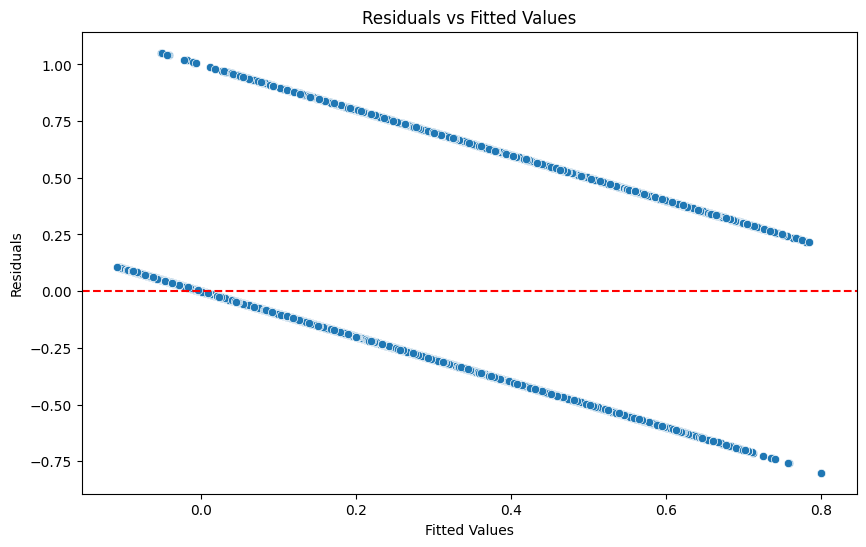

In [5]:
# Independence Check
from sklearn.linear_model import LinearRegression
# Residual plot to check for independence of residuals
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_linear = df[numerical_cols]
y_linear = df['Churn']

# model
model = LinearRegression()
model.fit(X_linear, y_linear)

# get prediction and residuals
y_pred = model.predict(X_linear)
residuals = y_linear - y_pred

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Doesn't fit independence

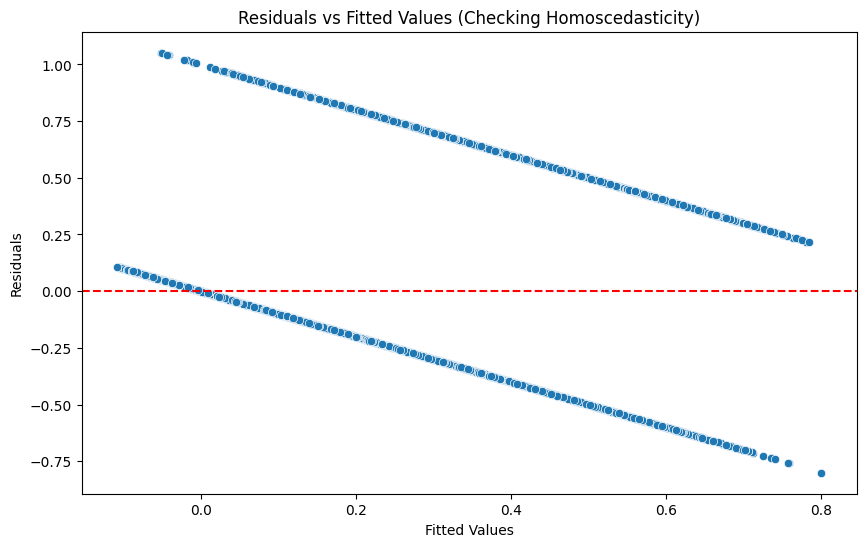

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values (Checking Homoscedasticity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Doesn't fit Homoscedasticity

<Figure size 800x600 with 0 Axes>

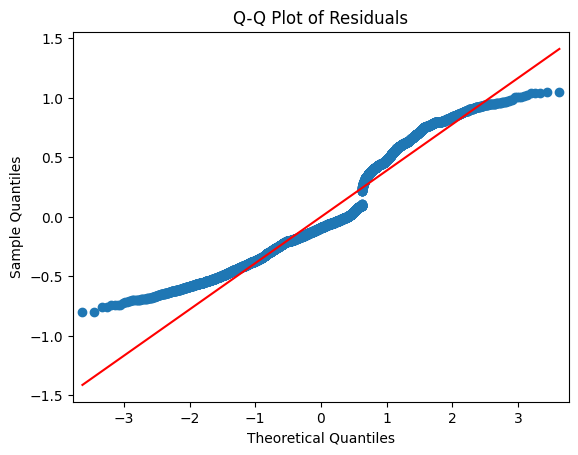

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


Doesn't perfectly fit normality

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_with_const = sm.add_constant(X)
# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

         Variable        VIF
0           const  14.899868
1          tenure   5.836728
2  MonthlyCharges   3.216730
3    TotalCharges   9.510931


Doesn't fit No Multicollinearity, except for tenure

Logistic Assumption Check

<ipython-input-10-75794d6ff51b>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_mean = df.groupby('bin')['Churn'].mean()
<ipython-input-10-75794d6ff51b>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers = df.groupby('bin')[col].mean()  # Get the mean of each bin for x-axis


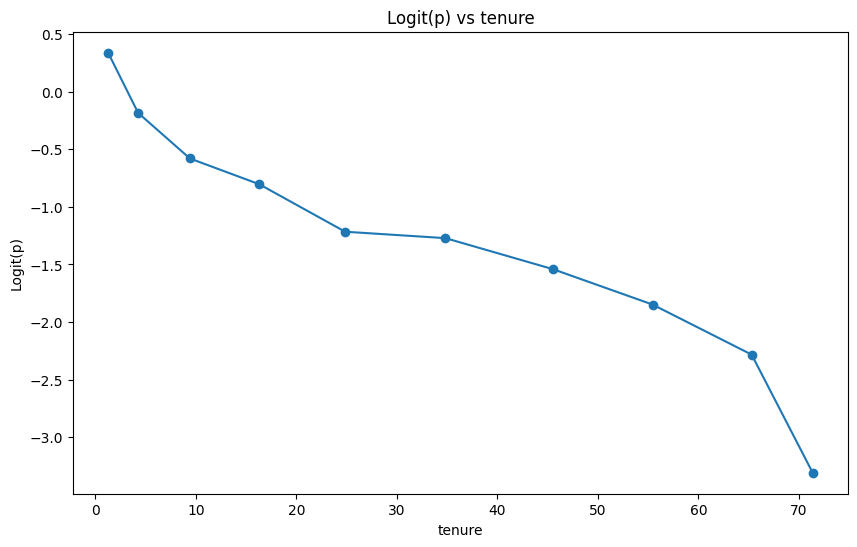

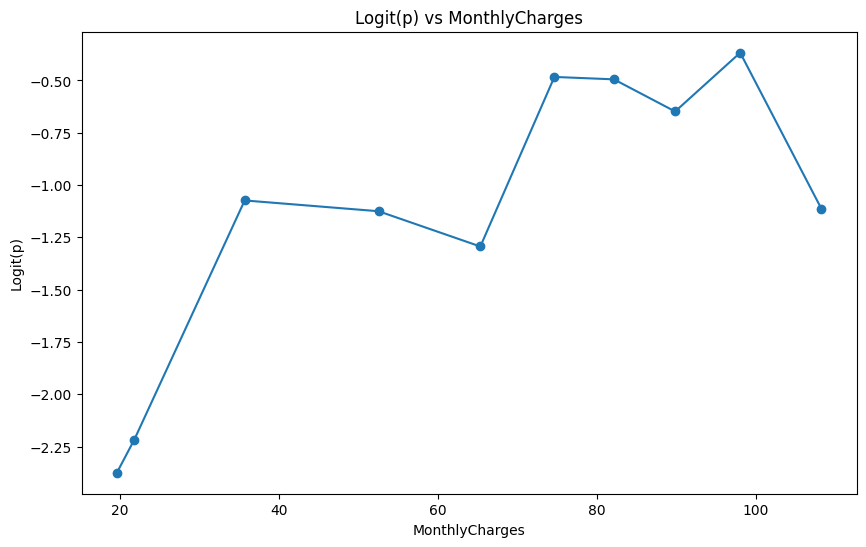

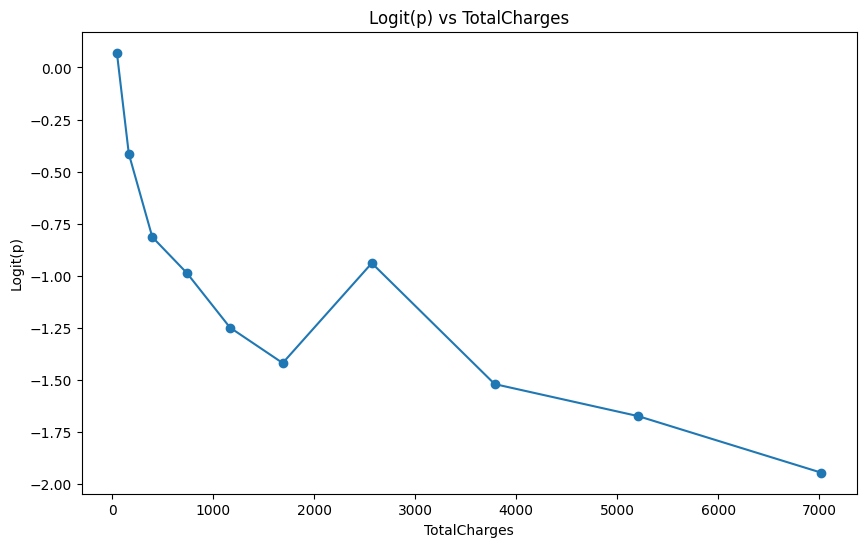

In [10]:
# logistic Linearity check
from scipy.stats import binned_statistic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate logit(p)
def logit(p):
    return np.log(p / (1 - p))

# Check linearity for each numerical feature
for col in numerical_cols:
    # Create bins for the numerical column
    df['bin'] = pd.qcut(df[col], q=10, duplicates='drop')

    # Calculate the mean Churn for each bin
    bin_mean = df.groupby('bin')['Churn'].mean()

    # Drop bins where Churn mean is 0 or 1 to avoid log(0) issues
    bin_mean = bin_mean[(bin_mean > 0) & (bin_mean < 1)]

    # Apply logit transformation
    log_odds = logit(bin_mean)

    # Plot logit(p) vs the bin centers
    plt.figure(figsize=(10, 6))
    bin_centers = df.groupby('bin')[col].mean()  # Get the mean of each bin for x-axis
    plt.plot(bin_centers, log_odds, marker='o')
    plt.title(f'Logit(p) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Logit(p)')
    plt.show()



Only Tenure shows linearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# define data
X = df[numerical_cols]

# model
X_with_const = sm.add_constant(X)

# calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# print result
print(vif_data)

         Variable        VIF
0           const  14.899868
1          tenure   5.836728
2  MonthlyCharges   3.216730
3    TotalCharges   9.510931


Doesn't fit No Multicollinearity, except for tenure

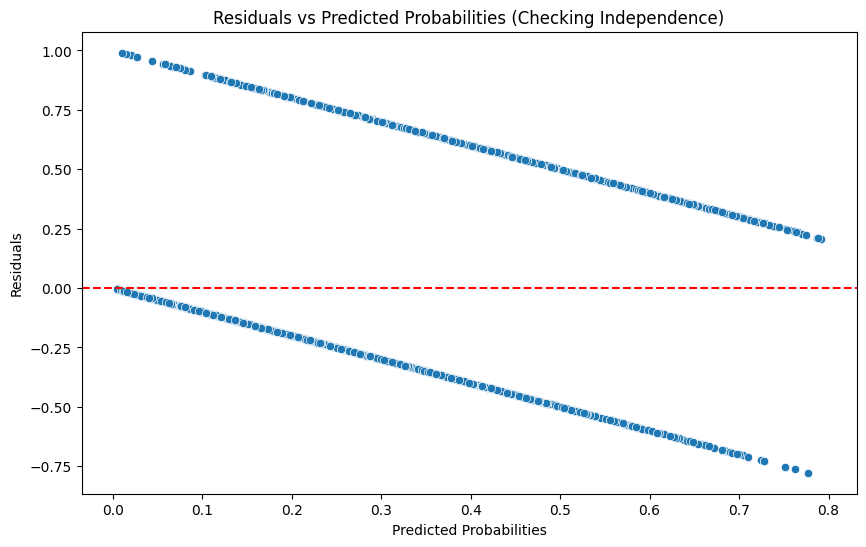

In [14]:
from sklearn.model_selection import train_test_split
# Step 1: Train a logistic regression model
X = df[numerical_cols]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 2: Get the predicted probabilities
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities of class 1 (Churn=1)

# Step 3: Calculate residuals
# Residuals = Actual values - Predicted probabilities
residuals = y_test - y_pred_probs

# Step 4: Plot residuals vs predicted probabilities to check for independence
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_probs, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Probabilities (Checking Independence)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.show()


Doesn't fit independence

Optimization terminated successfully.
         Current function value: 0.453583
         Iterations 7


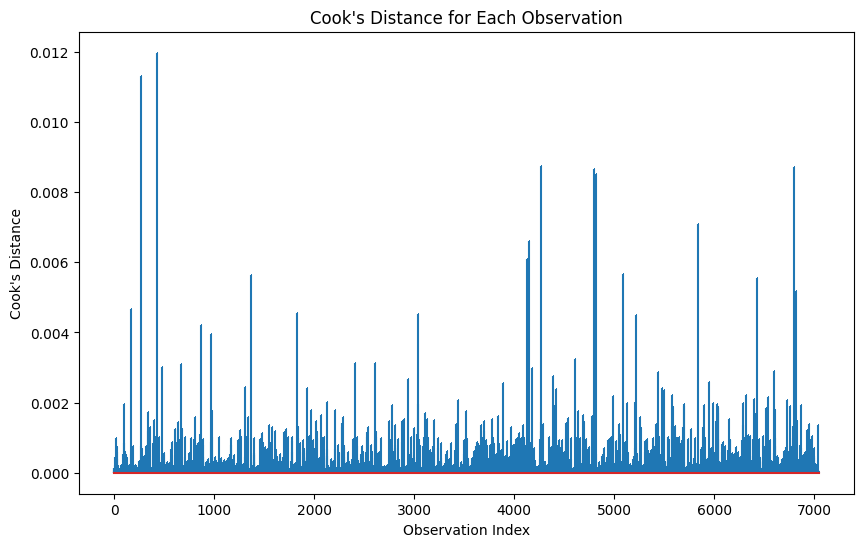

Influential points (Cook's Distance > 1): []


In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Add a constant to the independent variables (for intercept)
X_with_const = sm.add_constant(X)

# Step 2: Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_const).fit()

# Step 3: Get influence measures
influence = logit_model.get_influence()

# Step 4: Get Cook's distance
cooks_d, _ = influence.cooks_distance

# Step 5: Plot Cook's distance to identify influential outliers
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Step 6: Identify points where Cook's Distance > 1 (Potential influential points)
influential_points = np.where(cooks_d > 1)[0]
print(f"Influential points (Cook's Distance > 1): {influential_points}")


No influential outliers

In [18]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     48.6631
Link Function:                     IdentityLink Log Likelihood:                                -17166.5375
Number of Samples:                         7043 AIC:                                            34432.4011
                                                AICc:                                           34433.1208
                                                GCV:                                                0.1453
                                                Scale:                                              0.1435
                                                Pseudo R-Squared:                                   0.2689
Feature Function                  Lam

<ipython-input-20-8b57dc3305d8>:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


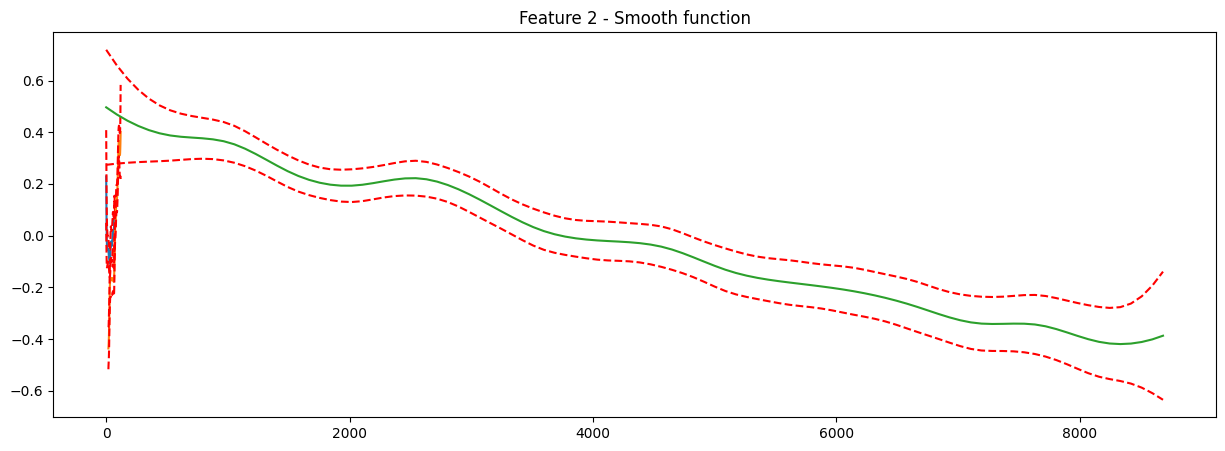

In [20]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Assuming 'X' is your input data and 'y' is your target variable

# Fit a GAM model with splines for each feature
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

# Print summary of the model
print(gam.summary())

# Plot the smooth functions for each feature
plt.figure(figsize=(15, 5))
for i in range(X.shape[1]):  # Loop through each feature
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    plt.title(f"Feature {i} - Smooth function")
plt.show()



fit Smoothness

2. Linear Regression

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = df.select_dtypes(include=['uint8']).columns.tolist()

# Prepare feature matrix X and target vector y
X = df[numerical_cols + categorical_cols]
y = df['Churn']  # Churn is already binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Use statsmodels for more detailed output and coefficient interpretation
X_train_with_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_with_const).fit()
print(sm_model.summary())

# Evaluate model performance on test set
y_pred = linear_model.predict(X_test)

# assess model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     447.9
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.66e-257
Time:                        20:21:36   Log-Likelihood:                -2354.4
No. Observations:                4930   AIC:                             4717.
Df Residuals:                    4926   BIC:                             4743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0716      0.021      3.

Every 1 month increase in tenure will expect tp cause Churn to decrease by 0.0027.

Every unit increase in MonthlyCharges will expect to cause Churn to increase by 0.0069.

Every unit increase in TotalCharges will expect to casue churn to decrease by7.323e-05.

const be 0.0716, saying that when tenure, MonthlyCharges, and TotalCharges be 0, Churn is expect to be 0.0716

R-Squared is 0.214, saying the model explained about 21.4% data, which is not sufficient.

Using linear model on binary value may be not appropriate.

3. Logistic Regression (Asked ChatGPT for model evaluation)

In [24]:
X = df[numerical_cols + categorical_cols]
y = df['Churn']

# fit logistic model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

# explain coefficient
X_with_const = sm.add_constant(X)  # add const
sm_logit_model = sm.Logit(y, X_with_const).fit()
print(sm_logit_model.summary())  # output result


y_pred_prob = log_model.predict_proba(X)[:, 1]
y_pred_class = log_model.predict(X)

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_class))

print("\nClassification Report:")
print(classification_report(y, y_pred_class))

Optimization terminated successfully.
         Current function value: 0.453583
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7039
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.2161
Time:                        20:39:21   Log-Likelihood:                -3194.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6195      0.117    -13.834      0.000      -1.849      -1.390
tenure           

const = -1.6195, representing that when other factors equal 0, the chance for leaving is expect to be -161.95%, which shows extremly low chance to leave.

tenure = -0.0664, saying that when tenure increase by 1 month, the chance for leave is expect to lower by 6.64%.

MonthlyCharges = 0.0304, saying that when MonthlyCharges increase by 1 unit, the chance for leaveing is expect to increase 3.04%.

TotalCharges = 0.0001, saying that when MonthlyCharges increase by 1 unit, the chance for leaveing is expect to increase 0.01%

Pseudo R-squ = 0.2161, saying the model explained 21.61% of the data.

3. GAM

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     38.2025
Link Function:                        LogitLink Log Likelihood:                                 -3055.9175
Number of Samples:                         7043 AIC:                                             6188.2401
                                                AICc:                                            6188.6903
                                                UBRE:                                                2.883
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2501
Feature Function                  Lam

<ipython-input-26-2231961424f0>:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


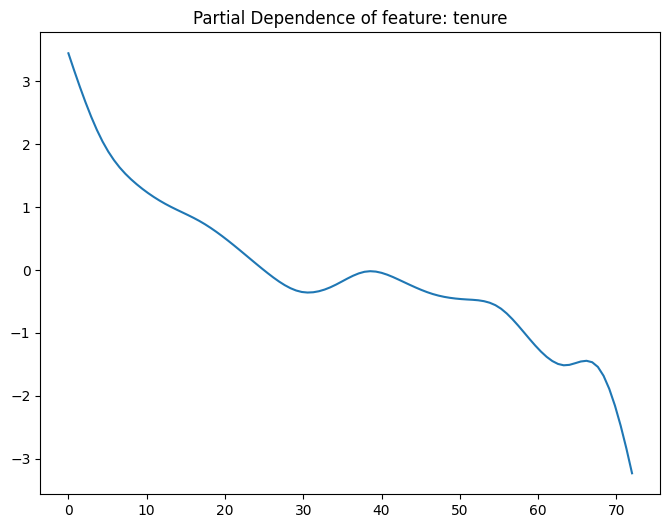

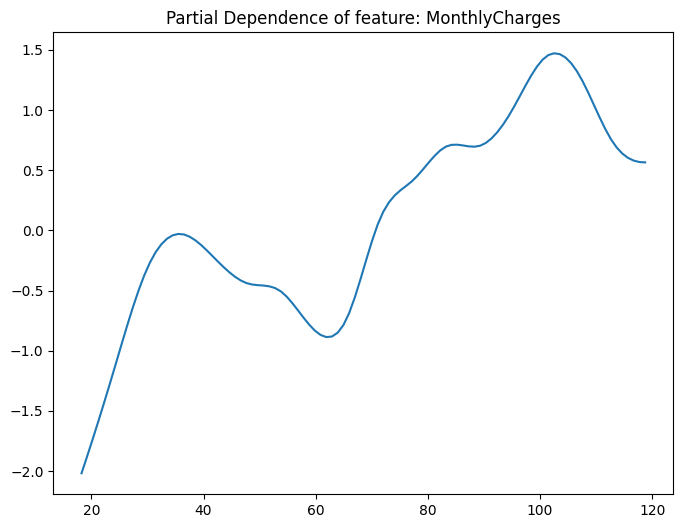

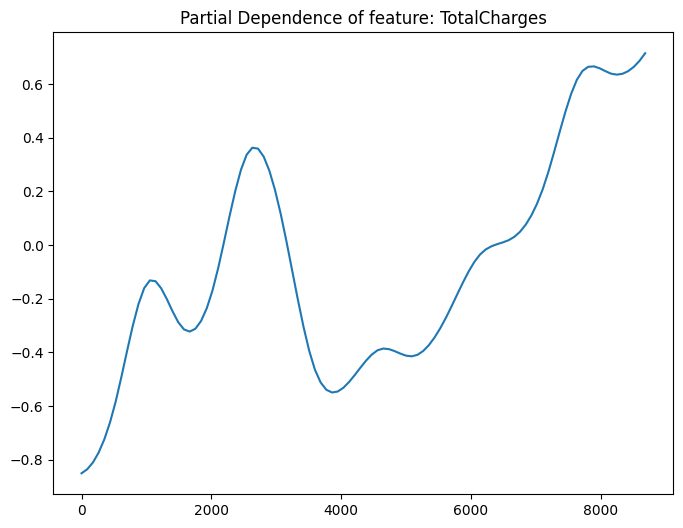

In [26]:
from pygam import LogisticGAM, s, f

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = df.select_dtypes(include=['uint8']).columns.tolist()  # One-hot encoded categorical features

# Prepare feature matrix X and target variable y
X = df[numerical_cols + categorical_cols]
y = df['Churn']  # Binary target variable (0 or 1)

# Step 2: Build the GAM model
# Using smooth functions for numerical variables (s(0) for 'tenure', s(1) for 'MonthlyCharges', and s(2) for 'TotalCharges')
gam = LogisticGAM(s(0) + s(1) + s(2)).fit(X, y)

# Step 3: View the model summary to interpret coefficients and significance of terms
print(gam.summary())

# Step 4: Predict on the same data (since we're not splitting the dataset)
y_pred = gam.predict(X)  # Predict churn classes (0 or 1)
y_pred_prob = gam.predict_proba(X)  # Predict churn probabilities

# Step 5: Evaluate the model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Step 6: Visualize the smooth functions for each numerical feature
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    plt.figure(figsize=(8, 6))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f"Partial Dependence of feature: {numerical_cols[i]}")
    plt.show()